In [1]:
import astropy
from astropy import io
from astropy.io import fits
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import math 
import cmath
from itertools import product
import matplotlib.colors as mcolors

In [2]:
def cleaner(file, column_name, condition): 
    #file = pd.DataFrame(file.data)
    file = file[np.logical_not(np.isnan(file))]
    file = file[np.logical_not(np.isinf(file))]
    file = file[condition(file[column_name])]
    file.head()
    return(file)

def main_cleaner(file, condition): 
    for i in file.columns:
        file = file[np.logical_not(np.isnan(file))]
        file = file[np.logical_not(np.isinf(file))]
        file = cleaner(file, i, condition)
        file = file[np.logical_not(np.isnan(file))]
    return(file)

def gtr0(x):
    return x > 0.0

In [3]:
fits_data = astropy.io.fits.open('asu.fit')
zcosmos = fits_data[1].data

In [4]:
name_info = fits_data[1].columns
print([i.name for i in name_info])
zcosmos_names = [i.name for i in name_info]

['zCOSMOS', 'RAJ2000', 'DEJ2000', 'z', 'CClass', 'Imag', 'Mask']


In [5]:
useful_columns_zcosmos_data = [zcosmos_names[3], zcosmos_names[5]]

In [6]:
z = useful_columns_zcosmos_data[0]
zcosmos_redshift = zcosmos[z]
print(zcosmos_redshift)

[ 0.8798  0.6972  0.9069 ...,  0.7077  0.6776  0.8266]


In [7]:
fits_data2 = astropy.io.fits.open('asu2.fit')
cosmos = fits_data2[1].data

In [84]:
cosmos = main_cleaner(cosmos, gtr0)

In [85]:
name_info2 = fits_data2[1].columns
print([i.name for i in name_info2])
cosmos_names = [i.name for i in name_info2]

['COSMOS', 'RAJ2000', 'DEJ2000', 'istar', 'imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'NB816', 'zphot']


In [86]:
zcosmos = pd.DataFrame(fits_data[1].data)

,zCOSMOS,RAJ2000,DEJ2000,z,CClass,Imag,Mask
0,700137,150.502792,1.877646,0.8798,1.5,22.27,1
1,700142,150.395737,1.837453,0.6972,3.5,21.96,1
2,700178,150.305008,1.876265,0.9069,9.5,22.24,1
3,700189,150.308258,1.916484,0.8964,2.5,21.84,1
4,700210,150.210480,1.828116,0.2835,1.5,22.14,1


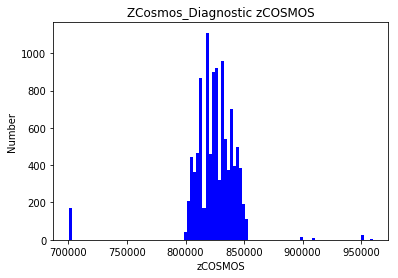

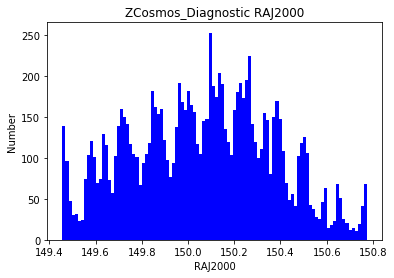

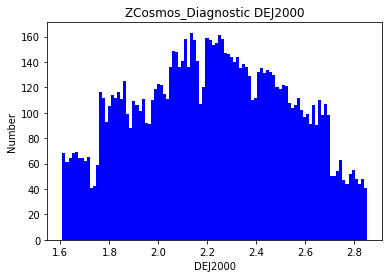

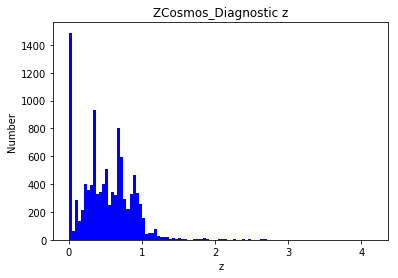

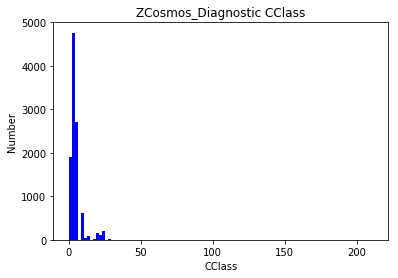

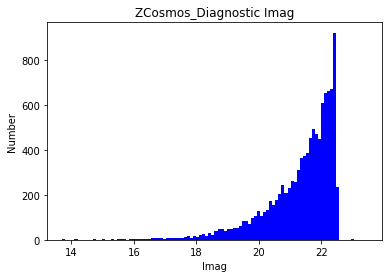

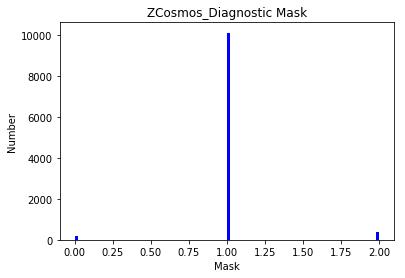

In [87]:
##diagnostic to find abnormal placeholder values for removal
for i in zcosmos:
    plt.hist(zcosmos[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("ZCosmos_Diagnostic" + " " + i)
    ##plt.savefig("ZCosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [148]:
##remove abnormal placeholder values
zcosmos = main_cleaner(zcosmos_df, gtr0)

In [89]:
cosmos_df = pd.DataFrame(fits_data2[1].data)
cosmos_df.head()

,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,umag,Bmag,Vmag,gmag,rmag,imag,zmag,Kmag,NB816,zphot
0,26429,150.74847,1.62620,0.40,24.1249,1,25.4934,24.9912,24.9563,25.2105,24.7035,24.2957,23.5802,23.1113,24.2467,1.34
1,26430,150.78005,1.62618,0.14,23.7194,1,25.0668,24.5890,24.6187,24.8700,24.4337,24.0031,23.4544,22.9926,23.9513,0.76
2,26431,150.79328,1.62584,0.80,23.5582,1,25.1767,24.6644,24.1307,24.6667,23.9864,23.6708,23.2240,22.4682,23.5978,0.40
3,26433,150.73299,1.62607,0.60,24.8256,1,25.1141,24.8163,24.7607,24.7935,24.9016,24.7355,24.3860,0.0000,24.6030,0.01
4,26436,150.73218,1.62422,0.16,23.7084,1,24.9316,24.5043,24.0938,24.5801,23.8355,23.9121,23.5610,22.0594,23.8575,0.34


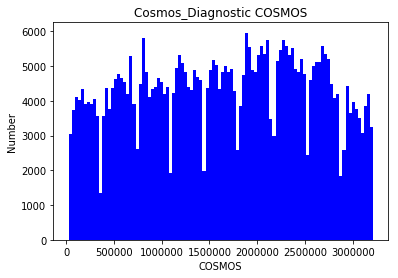

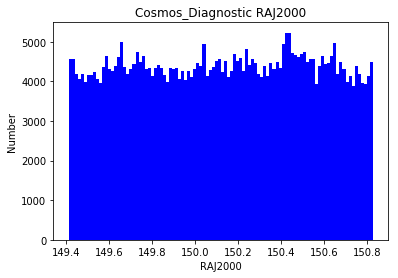

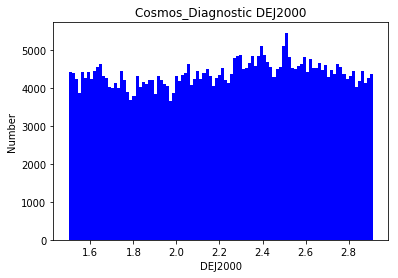

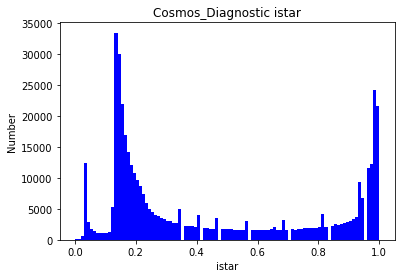

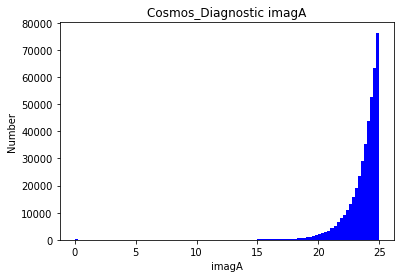

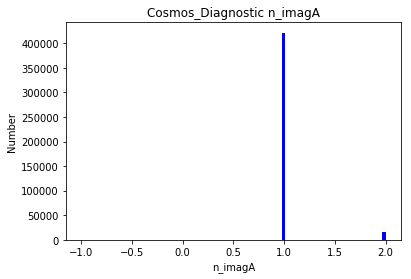

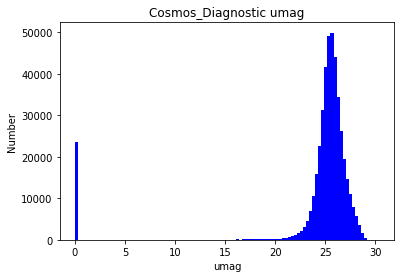

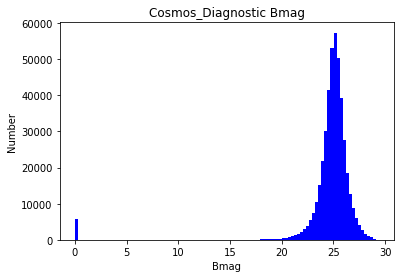

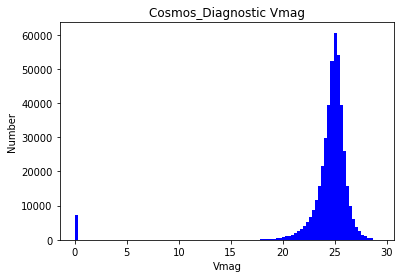

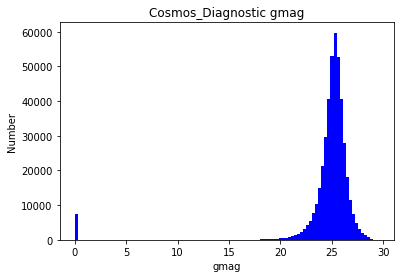

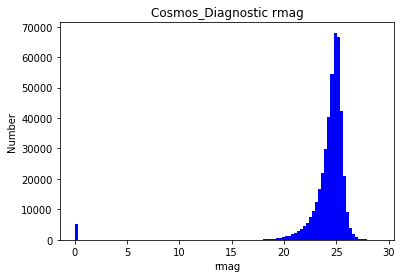

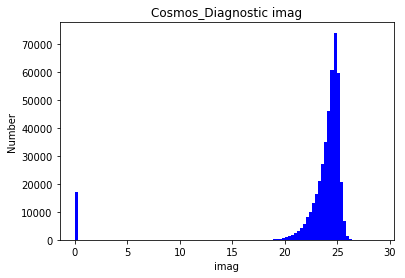

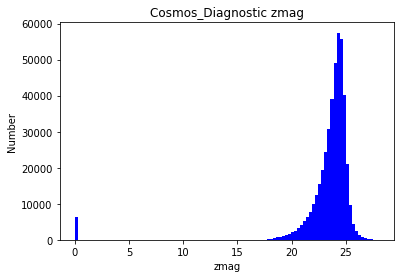

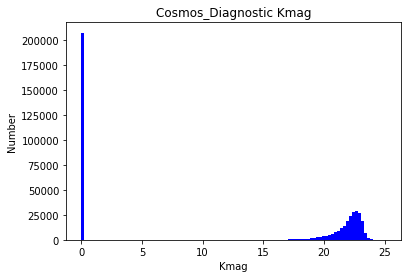

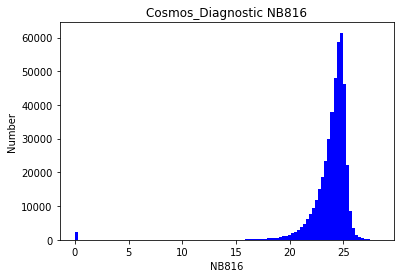

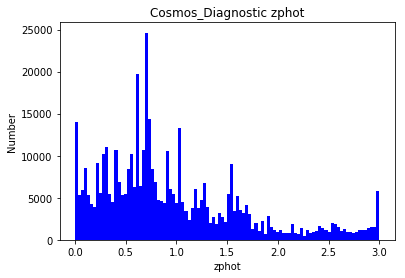

In [90]:
##diagnostic to find abnormal placeholder values for removal
for i in cosmos_df:
    plt.hist(cosmos_df[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_Diagnostic" + " " + i)
    ##plt.savefig("Cosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [91]:
cosmos = main_cleaner(cosmos_df, gtr0)

In [92]:
##cross match of cosmos and zcosmos from http://cdsxmatch.u-strasbg.fr/xmatch
cosmos_and_zcosmos_cross_match1= pd.read_csv('cross_match.csv')

In [93]:
cosmos_and_zcosmos_cross_match1.columns


Index(['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000',
       'istar', 'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag',
       'NB816', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
       'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask'],
      dtype='object')

In [94]:
cosmos_and_zcosmos_cross_match = main_cleaner(cosmos_and_zcosmos_cross_match1, gtr0)

In [95]:
cosmos_and_zcosmos_cross_match_useful_columns = ['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000', 
                                                  'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
                                                  'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask']

angDist


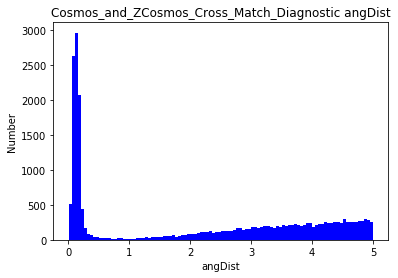

_RAJ2000


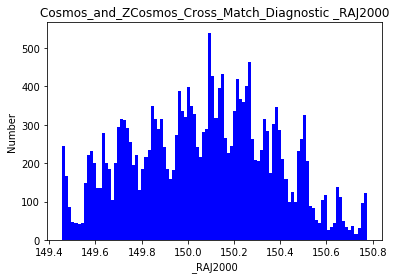

_DEJ2000


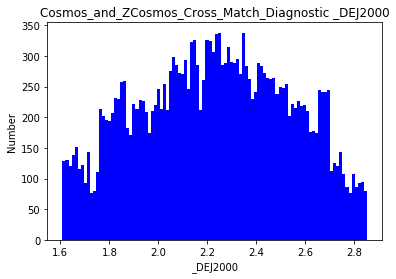

COSMOS


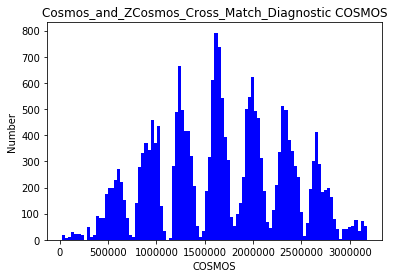

RAJ2000


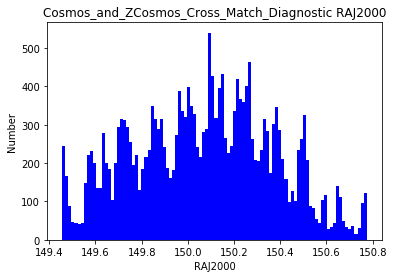

DEJ2000


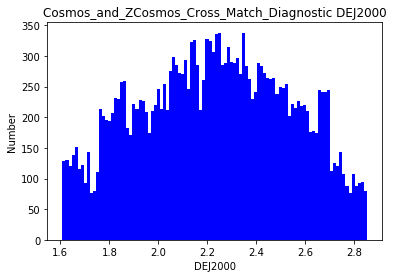

imagA


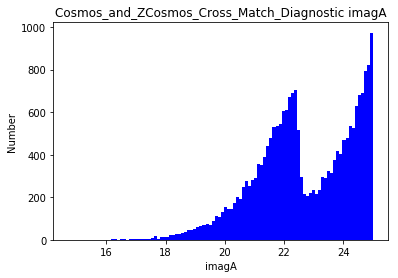

n_imagA


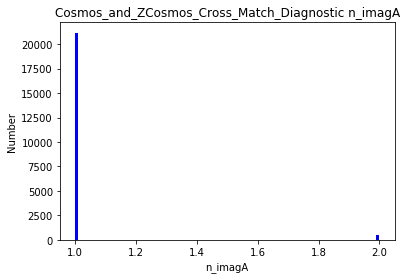

Bmag


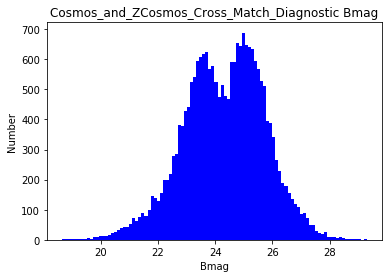

Vmag


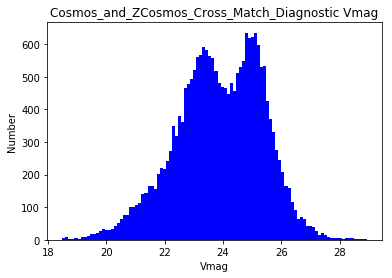

gmag


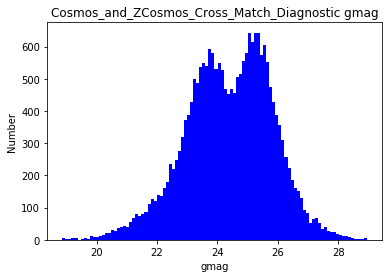

rmag


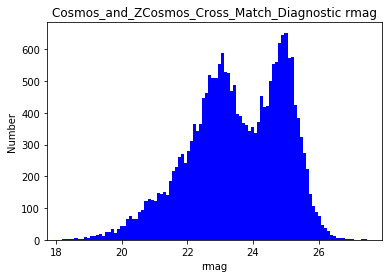

zmag


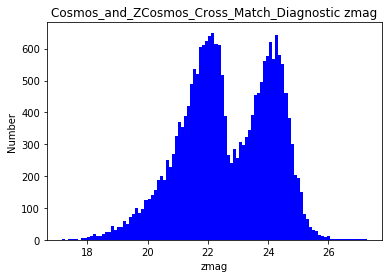

zphot


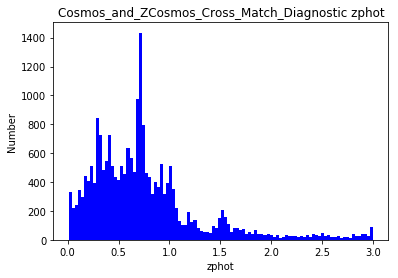

_RAJ2000.1


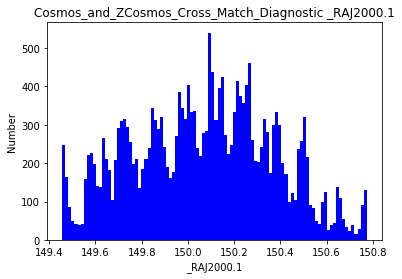

_DEJ2000.1


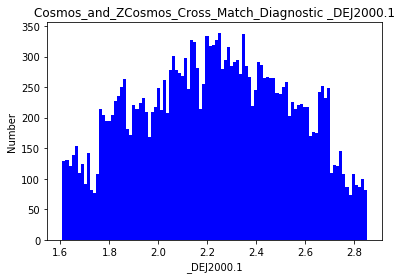

zCOSMOS


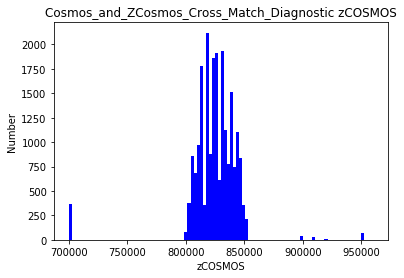

RAJ2000.1


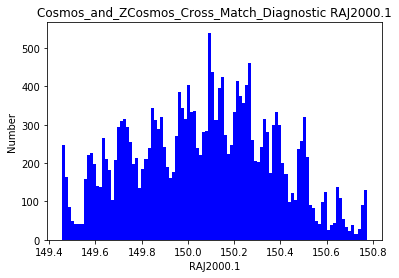

DEJ2000.1


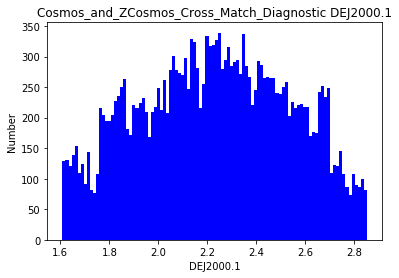

z


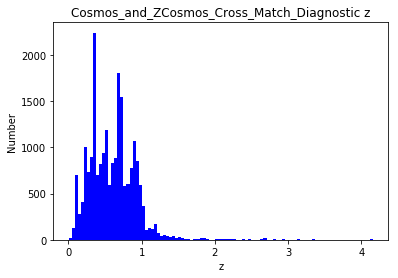

CClass


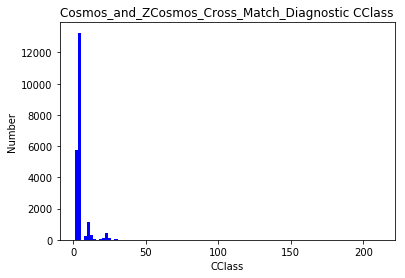

Imag


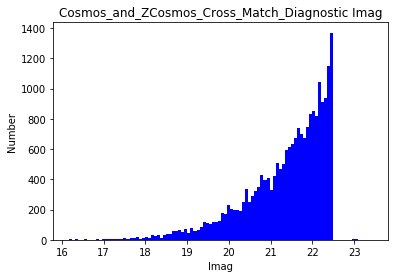

Mask


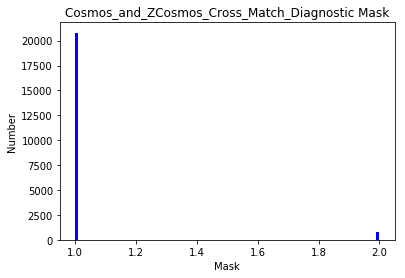

In [96]:
for i in cosmos_and_zcosmos_cross_match_useful_columns:
    print(i)
    plt.hist(cosmos_and_zcosmos_cross_match[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i)
    ##plt.savefig("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [97]:
value_counts_zcosmos = cosmos_and_zcosmos_cross_match['zCOSMOS'].value_counts(sort=False)
counts_zcosmos = value_counts_zcosmos.tolist()
value_counts_cosmos_and_zcosmos_cross_match = cosmos_and_zcosmos_cross_match['zCOSMOS'].value_counts(sort=False)
counts_cosmos_and_zcosmos_cross_match = value_counts_cosmos_and_zcosmos_cross_match.tolist()
ids_zcosmos = value_counts_zcosmos.keys().tolist()

value_counts_cosmos = cosmos_and_zcosmos_cross_match['COSMOS'].value_counts(sort=False)
counts_cosmos = value_counts_cosmos.tolist()
ids_cosmos = value_counts_cosmos.keys().tolist()

In [98]:
##find cosmos ids of cross match elements with zcosmos id used


match_indices_zcosmos = cosmos_and_zcosmos_cross_match['zCOSMOS']
# print(match_indices_zcosmos)
zcosmos_unique = {}
# print(zcosmos_unique)
(zcosmos_unique['zcosmos_ids'], zcosmos_unique['xmatch_indices'], zcosmos_unique['counts']) = np.unique(match_indices_zcosmos, return_index=True, return_counts=True)
# unique_xmatch_indices = zcosmos_unique['xmatch_indices']
# zcosmos_id1 = zcosmos_unique['zcosmos_ids']
for i in zcosmos_unique['counts']:
    
    
    
#     zcosmos_id2 = cosmos_and_zcosmos_cross_match[i][zcosmos_id1]
#     print(zcosmos_unique['zcosmos_ids'])
    #     cosmos_ids = 

    if zcosmos_unique['zcosmos_ids'][i] > 1:
        print('YAY')
#         cosmos_ids_set = (cosmos_and_zcosmos_cross_match['COSMOS'][i])
###    ids_cosmos = zcosmos_unique['xmatch_indices'][cosmos_and_zcosmos_cross_match['COSMOS'] == zcosmos_unique['zcosmos_ids'][i]].index.tolist()

YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY


YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY


YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY


YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY


In [99]:
match_indices_zcosmos = cosmos_and_zcosmos_cross_match['zCOSMOS']
# print(match_indices_zcosmos)
zcosmos_unique = {}
# print(zcosmos_unique)
(zcosmos_unique['zcosmos_ids'], zcosmos_unique['xmatch_indices'], zcosmos_unique['counts']) = np.unique(match_indices_zcosmos, return_index=True, return_counts=True)
# unique_xmatch_indices = zcosmos_unique['xmatch_indices']
# zcosmos_id1 = zcosmos_unique['zcosmos_ids']
#     print(zcosmos_unique['counts'])

# duplicated_indices = zcosmos_unique['xmatch_indices'][zcosmos_unique['counts'] > 1]
# for i in duplicated_indices:
#     print(i)
#     zcosmos_id = (cosmos_and_zcosmos_cross_match['zCOSMOS'][i])
#     print(zcosmos_id, np.where(zcosmos_unique['zcosmos_ids'] == zcosmos_id))
# #     print(cosmos_and_zcosmos_cross_match[COSMOS'][zcosmos_id])

In [100]:
##here is the document I actually need
cosmos_and_zcosmos_cross_match = cosmos_and_zcosmos_cross_match[cosmos_and_zcosmos_cross_match_useful_columns]

In [101]:
cosmos_only = cosmos_df_filtered[~cosmos_df_filtered['COSMOS'].isin(cosmos_and_zcosmos_cross_match['COSMOS'])]
zcosmos_only = zcosmos_df_filtered[~zcosmos_df_filtered['zCOSMOS'].isin(cosmos_and_zcosmos_cross_match['zCOSMOS'])]

In [ ]:
zcosmos_only = 

In [102]:
transmission_rate = [.7, .93, .94, .95, .96]
np.savetxt('transmission_rate.txt', transmission_rate)

In [103]:
new_transmission_rate = np.genfromtxt("transmission_rate.txt")

In [104]:
print(new_transmission_rate)

[ 0.7   0.93  0.94  0.95  0.96]


In [105]:
# Blue, 0 
# Umag: 4.996547735709 
# Gmag: 4.3757386228391
# Rmag: 4.6764732017454
# Imag: 4.792865128641
# Zmag: 4.7814960592642

Galaxies_and_Redshifts = {'Galaxy': ['Red', 'Blue'], 'Redshift': [0, 0.5, 1.5]}
Galaxies_and_Redshifts_List = list(itertools.product(Galaxies_and_Redshifts['Galaxy'], Galaxies_and_Redshifts['Redshift']))
Galaxies_and_Redshifts_List_df = pd.DataFrame(data = Galaxies_and_Redshifts_List, columns = Galaxies_and_Redshifts.keys())
# k = 0
# for i in d['Galaxy']:
#     k += 1
#     for j in d['Redshift']:
#         IntermediateThing[k][0] = i
#         IntermediateThing[k][1] = j
# df = pd.DataFrame(data=d)
# df
Galaxies_and_Redshifts_List_df

,Galaxy,Redshift
0,Red,0.0
1,Red,0.5
2,Red,1.5
3,Blue,0.0
4,Blue,0.5
5,Blue,1.5


In [106]:
Galaxies_and_Redshifts_List_df['UltraViolet'] = pd.Series([.15, .0, .0, .45, .5, .7], index=Galaxies_and_Redshifts_List_df.index)

In [107]:
Galaxies_and_Redshifts_List_df['Green'] = pd.Series([.55, .1, .0, .6, .4, .5], index=Galaxies_and_Redshifts_List_df.index)

In [108]:
Galaxies_and_Redshifts_List_df['Red'] = pd.Series([.6, .1, .01, .45, .7, .45], index=Galaxies_and_Redshifts_List_df.index)

In [109]:
Galaxies_and_Redshifts_List_df['InfraRed'] = pd.Series([.75, .65, .075, .4, .6, .5], index=Galaxies_and_Redshifts_List_df.index)

In [110]:
Galaxies_and_Redshifts_List_df['Z'] = pd.Series([.75, .75, .65, .4, .55, .8], index=Galaxies_and_Redshifts_List_df.index)

In [111]:
Galaxies_and_Redshifts_List_df

,Galaxy,Redshift,UltraViolet,Green,Red,InfraRed,Z
0,Red,0.0,0.15,0.55,0.60,0.750,0.75
1,Red,0.5,0.00,0.10,0.10,0.650,0.75
2,Red,1.5,0.00,0.00,0.01,0.075,0.65
3,Blue,0.0,0.45,0.60,0.45,0.400,0.40
4,Blue,0.5,0.50,0.40,0.70,0.600,0.55
5,Blue,1.5,0.70,0.50,0.45,0.500,0.80


In [112]:
Galaxies_and_Redshifts_List_df.to_csv('Galaxies_and_Redshifts_List_df.csv', columns = Galaxies_and_Redshifts_List_df.columns, index = False)

In [113]:
Galaxies_and_Redshifts_List_df = pd.read_csv('Galaxies_and_Redshifts_List_df.csv')

In [114]:
Galaxies_and_Redshifts_List_df

,Galaxy,Redshift,UltraViolet,Green,Red,InfraRed,Z
0,Red,0.0,0.15,0.55,0.60,0.750,0.75
1,Red,0.5,0.00,0.10,0.10,0.650,0.75
2,Red,1.5,0.00,0.00,0.01,0.075,0.65
3,Blue,0.0,0.45,0.60,0.45,0.400,0.40
4,Blue,0.5,0.50,0.40,0.70,0.600,0.55
5,Blue,1.5,0.70,0.50,0.45,0.500,0.80


In [115]:
Umag_list = []
for i in Galaxies_and_Redshifts_List_df['UltraViolet']:
    i = .7 * i
    i = i / 31.4
    if i == 0:
        i = 0
        print(i)
    else:
        i = math.log10(i)
        i = i * -2.5
        print(i)
    Umag_list.append(i)
Galaxies_and_Redshifts_List_df['Umag'] = pd.Series(Umag_list, index=Galaxies_and_Redshifts_List_df.index)

6.189350872508193
0
0
4.996547735709036
4.8821540093073486
4.516833920111754


In [116]:
Gmag_list = []
for i in Galaxies_and_Redshifts_List_df['Green']:
    i = .93 * i
    i = i / 31.4
    if i == 0:
        i = 0
        print(i)
    else:
        i = math.log10(i)
        i = i * -2.5
        print(i)
    Gmag_list.append(i)
Galaxies_and_Redshifts_List_df['Gmag'] = pd.Series(Gmag_list, index=Galaxies_and_Redshifts_List_df.index)

4.47021002506259
6.3211167487981985
0
4.375738622839091
4.815966770478293
4.5736917379581525


In [117]:
Rmag_list = []
for i in Galaxies_and_Redshifts_List_df['Red']:
    i = .94 * i
    i = i / 31.4
    if i == 0:
        i = 0
        print(i)
    else:
        i = math.log10(i)
        i = i * -2.5
        print(i)
    Rmag_list.append(i)
Galaxies_and_Redshifts_List_df['Rmag'] = pd.Series(Rmag_list, index=Galaxies_and_Redshifts_List_df.index)##I don't know why the only thing in the list is the last value of i

4.364126360224682
6.309504486183791
8.80950448618379
4.676473201745432
4.196759386148149
4.676473201745432


In [118]:
Imag_list = []
for i in Galaxies_and_Redshifts_List_df['InfraRed']:
    i = .95 * i
    i = i / 31.4
    if i == 0:
        i = 0
        print(i)
    else:
        i = math.log10(i)
        i = i * -2.5
        print(i)
    Imag_list.append(i)
Galaxies_and_Redshifts_List_df['Imag'] = pd.Series(Imag_list, index=Galaxies_and_Redshifts_List_df.index)

4.110361948481668
4.265731715353779
6.610361948481668
4.7928651286410116
4.352636981001809
4.550590096120871


In [119]:
Zmag_list = []
for i in Galaxies_and_Redshifts_List_df['Z']:
    i = .96 * i
    i = i / 31.4
    if i == 0:
        i = 0
        print(i)
    else:
        i = math.log10(i)
        i = i * -2.5
        print(i)
    Zmag_list.append(i)
Galaxies_and_Redshifts_List_df['Zmag'] = pd.Series(Zmag_list, index=Galaxies_and_Redshifts_List_df.index)

4.098992879104866
4.098992879104866
4.254362645976977
4.78149605926421
4.435739313848507
4.028921070104257


##I don't know why the only thing in each column is the last value of i
columns_for_this = ['UltraViolet', 'Green', 'Red', 'InfraRed', 'Z']
'UltraViolet Rate' = '.7'
'Green Rate' = '.93'
'Red Rate' = '.94'
'InfraRed Rate' = '.95'
'Z Rate' = '.96'
for x in columns_for_this:
    for i in Galaxies_and_Redshifts_List_df[x]:
        list = []
        Rate = x + Rate
        i = Rate * i
        i = i / 31.4
        if i == 0:
            i = 0
        else:
            i = math.log10(i)
            i = i * -2.5
        list.append(i)
    Galaxies_and_Redshifts_List_df[x[0] + 'mag'] = pd.Series(list, index=Galaxies_and_Redshifts_List_df.index)

In [120]:
Galaxies_and_Redshifts_List_df

,Galaxy,Redshift,UltraViolet,Green,Red,InfraRed,Z,Umag,Gmag,Rmag,Imag,Zmag
0,Red,0.0,0.15,0.55,0.60,0.750,0.75,6.189351,4.470210,4.364126,4.110362,4.098993
1,Red,0.5,0.00,0.10,0.10,0.650,0.75,0.000000,6.321117,6.309504,4.265732,4.098993
2,Red,1.5,0.00,0.00,0.01,0.075,0.65,0.000000,0.000000,8.809504,6.610362,4.254363
3,Blue,0.0,0.45,0.60,0.45,0.400,0.40,4.996548,4.375739,4.676473,4.792865,4.781496
4,Blue,0.5,0.50,0.40,0.70,0.600,0.55,4.882154,4.815967,4.196759,4.352637,4.435739
5,Blue,1.5,0.70,0.50,0.45,0.500,0.80,4.516834,4.573692,4.676473,4.550590,4.028921


In [121]:
help(Galaxies_and_Redshifts_List_df)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to np.arange(n) if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      np.arange(n) if no column labels are provided
 |  dtype : dtype, default None
 |      Data type to force, otherwise infer
 |  copy : boolean, d

In [122]:
Umag_Gmag = []
Gmag_Rmag = []
Rmag_Imag = []
Imag_Zmag = []
Zmag_Umag = []
for i in Galaxies_and_Redshifts_List_df.index:
    Umag2 = Galaxies_and_Redshifts_List_df['Umag'][i]
    Gmag2 = Galaxies_and_Redshifts_List_df['Gmag'][i]
    Rmag2 = Galaxies_and_Redshifts_List_df['Rmag'][i]
    Imag2 = Galaxies_and_Redshifts_List_df['Imag'][i]
    Zmag2 = Galaxies_and_Redshifts_List_df['Zmag'][i]
    ug = Umag2 - Gmag2
    gr = Gmag2 - Rmag2
    ri = Rmag2 - Imag2
    iz = Imag2 - Zmag2
    zu = Zmag2 - Umag2
    Umag_Gmag.append(ug)
    Gmag_Rmag.append(gr)
    Rmag_Imag.append(ri)
    Imag_Zmag.append(iz)
    Zmag_Umag.append(zu)
Galaxies_and_Redshifts_List_df['Umag-Gmag'] = pd.Series(Umag_Gmag, index=Galaxies_and_Redshifts_List_df.index)
Galaxies_and_Redshifts_List_df['Gmag-Rmag'] = pd.Series(Gmag_Rmag, index=Galaxies_and_Redshifts_List_df.index)
Galaxies_and_Redshifts_List_df['Rmag-Imag'] = pd.Series(Rmag_Imag, index=Galaxies_and_Redshifts_List_df.index)
Galaxies_and_Redshifts_List_df['Imag-Zmag'] = pd.Series(Imag_Zmag, index=Galaxies_and_Redshifts_List_df.index)
Galaxies_and_Redshifts_List_df['Zmag-Umag'] = pd.Series(Zmag_Umag, index=Galaxies_and_Redshifts_List_df.index)

In [123]:
Galaxies_and_Redshifts_List_df

,Galaxy,Redshift,UltraViolet,Green,Red,InfraRed,Z,Umag,Gmag,Rmag,Imag,Zmag,Umag-Gmag,Gmag-Rmag,Rmag-Imag,Imag-Zmag,Zmag-Umag
0,Red,0.0,0.15,0.55,0.60,0.750,0.75,6.189351,4.470210,4.364126,4.110362,4.098993,1.719141,0.106084,0.253764,0.011369,-2.090358
1,Red,0.5,0.00,0.10,0.10,0.650,0.75,0.000000,6.321117,6.309504,4.265732,4.098993,-6.321117,0.011612,2.043773,0.166739,4.098993
2,Red,1.5,0.00,0.00,0.01,0.075,0.65,0.000000,0.000000,8.809504,6.610362,4.254363,0.000000,-8.809504,2.199143,2.355999,4.254363
3,Blue,0.0,0.45,0.60,0.45,0.400,0.40,4.996548,4.375739,4.676473,4.792865,4.781496,0.620809,-0.300735,-0.116392,0.011369,-0.215052
4,Blue,0.5,0.50,0.40,0.70,0.600,0.55,4.882154,4.815967,4.196759,4.352637,4.435739,0.066187,0.619207,-0.155878,-0.083102,-0.446415
5,Blue,1.5,0.70,0.50,0.45,0.500,0.80,4.516834,4.573692,4.676473,4.550590,4.028921,-0.056858,-0.102781,0.125883,0.521669,-0.487913


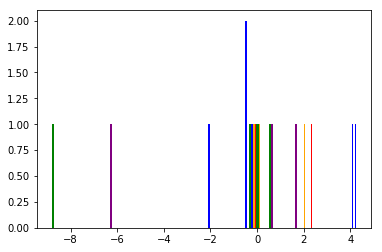

In [124]:
plt.hist(Galaxies_and_Redshifts_List_df['Umag-Gmag'], color='purple', linewidth=5, label='Umag-Gmag', bins=100)
plt.hist(Galaxies_and_Redshifts_List_df['Gmag-Rmag'], color='green', linewidth=5, label='Gmag-Rmag', bins=100)
plt.hist(Galaxies_and_Redshifts_List_df['Rmag-Imag'], color='orange', linewidth=5, label='Rmag-Imag', bins=100)
plt.hist(Galaxies_and_Redshifts_List_df['Imag-Zmag'], color='red', linewidth=5, label='Imag-Zmag', bins=100)
plt.hist(Galaxies_and_Redshifts_List_df['Zmag-Umag'], color='blue', linewidth=5, label='Zmag-Umag', bins=100)
plt.show()

In [125]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of


U-G
G-R
R-I
I-Z
Z-U

Umag-Gmag Gmag-Rmag
Umag-Gmag Rmag-Imag
Umag-Gmag Imag-Zmag
Umag-Gmag Zmag-Umag
Gmag-Rmag Rmag-Imag
Gmag-Rmag Imag-Zmag
Gmag-Rmag Zmag-Umag
Rmag-Imag Imag-Zmag
Rmag-Imag Zmag-Umag
Imag-Zmag Zmag-Umag

In [126]:
plt.scatter(Galaxies_and_Redshifts_List_df['Umag-Gmag'], Galaxies_and_Redshifts_List_df['Gmag-Rmag'], color='purple', marker='.', s=10, alpha=1)
plt.xlabel('Umag-Gmag')
plt.ylabel('Gmag-Rmag')
plt.savefig('scatter.png')

In [127]:
plt.scatter(Galaxies_and_Redshifts_List_df['Umag-Gmag'], Galaxies_and_Redshifts_List_df['Rmag-Imag'], color='purple', marker='.', s=10, alpha=1)
plt.xlabel('Umag-Gmag')
plt.ylabel('Rmag-Imag')
plt.savefig('scatter.png')

In [128]:
plt.scatter(Galaxies_and_Redshifts_List_df['Umag-Gmag'], Galaxies_and_Redshifts_List_df['Imag-Zmag'], color='purple', marker='.', s=10, alpha=1)
plt.xlabel('Umag-Gmag')
plt.ylabel('Imag-Zmag')
plt.savefig('scatter.png')

In [129]:
plt.scatter(Galaxies_and_Redshifts_List_df['Umag-Gmag'], Galaxies_and_Redshifts_List_df['Zmag-Umag'], color='purple', marker='.', s=10, alpha=1)
plt.xlabel('Umag-Gmag')
plt.ylabel('Zmag-Umag')
plt.savefig('scatter.png')

In [130]:
plt.scatter(Galaxies_and_Redshifts_List_df['Umag-Gmag'], Galaxies_and_Redshifts_List_df['Rmag-Imag'], color='purple', marker='.', s=10, alpha=1)
plt.xlabel('Umag-Gmag')
plt.ylabel('Rmag-Imag')
plt.savefig('scatter.png')

In [131]:
plt.scatter(Galaxies_and_Redshifts_List_df['Umag-Gmag'], Galaxies_and_Redshifts_List_df['Imag-Zmag'], color='purple', marker='.', s=10, alpha=1)
plt.xlabel('Umag-Gmag')
plt.ylabel('Imag-Zmag')
plt.savefig('scatter.png')

In [132]:
plt.scatter(Galaxies_and_Redshifts_List_df['Umag-Gmag'], Galaxies_and_Redshifts_List_df['Zmag-Umag'], color='purple', marker='.', s=10, alpha=1)
plt.xlabel('Umag-Gmag')
plt.ylabel('Zmag-Umag')
plt.savefig('scatter.png')

In [133]:
plt.scatter(Galaxies_and_Redshifts_List_df['Rmag-Imag'], Galaxies_and_Redshifts_List_df['Imag-Zmag'], color='purple', marker='.', s=10, alpha=1)
plt.xlabel('Rmag-Imag')
plt.ylabel('Imag-Zmag')
plt.savefig('scatter.png')

In [134]:
plt.scatter(Galaxies_and_Redshifts_List_df['Rmag-Imag'], Galaxies_and_Redshifts_List_df['Zmag-Umag'], color='purple', marker='.', s=10, alpha=1)
plt.xlabel('Rmag-Imag')
plt.ylabel('Zmag-Umag')
plt.savefig('scatter.png')

In [135]:
plt.scatter(Galaxies_and_Redshifts_List_df['Imag-Zmag'], Galaxies_and_Redshifts_List_df['Zmag-Umag'], color='purple', marker='.', s=10, alpha=1)
plt.xlabel('Imag-Zmag')
plt.ylabel('Zmag-Umag')
plt.savefig('scatter.png')

In [136]:
Vmag2_Bmag2 = []
Bmag2_gmag2 = []
gmag2_rmag2 = []
rmag2_Imag2 = []
Imag2_zmag2 = []
zmag2_Vmag2 = []
for i in cosmos_and_zcosmos_cross_match.index:
    Vmag2 = cosmos_and_zcosmos_cross_match['Vmag'][i]
    Bmag2 = cosmos_and_zcosmos_cross_match['Bmag'][i]
    gmag2 = cosmos_and_zcosmos_cross_match['gmag'][i]
    rmag2 = cosmos_and_zcosmos_cross_match['rmag'][i]
    Imag2 = cosmos_and_zcosmos_cross_match['Imag'][i]
    zmag2 = cosmos_and_zcosmos_cross_match['zmag'][i]
    vb = Vmag2 - Bmag2
    bm = Bmag2 - gmag2
    gr = gmag2 - rmag2
    ri = rmag2 - Imag2
    iz = Imag2 - zmag2
    zv = zmag2 - Vmag2
    Vmag2_Bmag2.append(vb) 
    Bmag2_gmag2.append(bm)
    gmag2_rmag2.append(gr)
    rmag2_Imag2.append(ri)
    Imag2_zmag2.append(iz)
    zmag2_Vmag2.append(zv)
cosmos_and_zcosmos_cross_match['Vmag2 - Bmag2'] = pd.Series(Vmag2_Bmag2, index=cosmos_and_zcosmos_cross_match.index)
cosmos_and_zcosmos_cross_match['Bmag2 - gmag2'] = pd.Series(Bmag2_gmag2, index=cosmos_and_zcosmos_cross_match.index)
cosmos_and_zcosmos_cross_match['gmag2 - rmag2'] = pd.Series(gmag2_rmag2, index=cosmos_and_zcosmos_cross_match.index)
cosmos_and_zcosmos_cross_match['rmag2 - Imag2'] = pd.Series(rmag2_Imag2, index=cosmos_and_zcosmos_cross_match.index)
cosmos_and_zcosmos_cross_match['Imag2 - zmag2'] = pd.Series(Imag2_zmag2, index=cosmos_and_zcosmos_cross_match.index)
cosmos_and_zcosmos_cross_match['zmag2 - Vmag2'] = pd.Series(zmag2_Vmag2, index=cosmos_and_zcosmos_cross_match.index)

In [137]:
cosmos_and_zcosmos_cross_match

,angDist,_RAJ2000,_DEJ2000,COSMOS,RAJ2000,DEJ2000,imagA,n_imagA,Bmag,Vmag,...,z,CClass,Imag,Mask,Vmag2 - Bmag2,Bmag2 - gmag2,gmag2 - rmag2,rmag2 - Imag2,Imag2 - zmag2,zmag2 - Vmag2
0,0.072302,150.21992,2.27797,1603755,150.21992,2.27797,21.8588,1,23.2285,22.9007,...,0.7288,1.1,22.21,1,-0.3278,-0.0539,0.7934,0.2790,0.5000,-1.1907
2,0.113585,150.20375,2.27275,1603935,150.20375,2.27275,22.1439,1,25.8226,24.3529,...,0.8795,3.5,22.09,1,-1.4697,0.2831,1.9263,1.5232,0.4209,-2.6838
3,0.046088,150.11016,2.27258,1603958,150.11016,2.27258,21.0134,1,23.1575,22.5545,...,0.4922,3.5,20.95,1,-0.6030,-0.0653,1.1809,1.0919,-0.2635,-1.3410
4,3.310317,150.10933,2.27219,1604021,150.10933,2.27219,24.8869,1,25.9311,25.8985,...,0.4922,3.5,20.95,1,-0.0326,-0.7803,1.3366,4.4248,-3.5925,-1.3560
9,0.083979,150.13958,2.27073,1604303,150.13958,2.27073,20.4569,1,22.1714,21.6402,...,0.4410,4.5,20.42,1,-0.5312,-0.0977,1.0044,0.8447,-0.2379,-0.9823
10,0.055028,150.15596,2.26988,1604538,150.15596,2.26988,21.6291,1,22.8113,22.3259,...,0.2085,4.5,21.70,1,-0.4854,-0.0150,0.6052,0.5211,-0.2012,-0.4247
12,0.126364,150.12144,2.26730,1604544,150.12144,2.26730,21.4270,1,22.5625,22.4641,...,0.8270,4.5,21.35,1,-0.0984,-0.1314,0.3674,0.9765,-0.2238,-0.8903
16,0.093596,150.09232,2.26948,1604701,150.09232,2.26948,21.7974,1,23.5119,23.1900,...,0.6857,4.5,21.76,1,-0.3219,-0.1000,0.8985,0.9534,-0.0201,-1.4099
17,2.468821,150.09166,2.26946,1604703,150.09166,2.26946,24.7523,1,25.7680,25.3855,...,0.6857,4.5,21.76,1,-0.3825,-0.3806,1.1056,3.2830,-2.5665,-1.0590
18,4.167810,150.06219,2.26763,1604825,150.06219,2.26763,23.1826,1,24.9839,24.4518,...,1.0720,1.5,22.24,1,-0.5321,-0.0889,1.0710,1.7618,-1.2158,-0.9960


In [ ]:
Vmag2_Bmag2 = []
Bmag2_gmag2 = []
gmag2_rmag2 = []
rmag2_imag2 = []
imag2_zmag2 = []
zmag2_Vmag2 = []
for i in cosmos_only.index:
    Vmag2 = cosmos_only['Vmag'][i]
    Bmag2 = cosmos_only['Bmag'][i]
    gmag2 = cosmos_only['gmag'][i]
    rmag2 = cosmos_only['rmag'][i]
    imag2 = cosmos_only['imag'][i]
    zmag2 = cosmos_only['zmag'][i]
    vb = Vmag2 - Bmag2
    bm = Bmag2 - gmag2
    gr = gmag2 - rmag2
    ri = rmag2 - Imag2
    iz = Imag2 - zmag2
    zv = zmag2 - Vmag2
    Vmag2_Bmag2.append(vb) 
    Bmag2_gmag2.append(bm)
    gmag2_rmag2.append(gr)
    rmag2_imag2.append(ri)
    imag2_zmag2.append(iz)
    zmag2_Vmag2.append(zv)
cosmos_only['Vmag2 - Bmag2'] = pd.Series(Vmag2_Bmag2, index=cosmos_only.index)
cosmos_only['Bmag2 - gmag2'] = pd.Series(Bmag2_gmag2, index=cosmos_only.index)
cosmos_only['gmag2 - rmag2'] = pd.Series(gmag2_rmag2, index=cosmos_only.index)
cosmos_only['rmag2 - imag2'] = pd.Series(rmag2_imag2, index=cosmos_only.index)
cosmos_only['imag2 - zmag2'] = pd.Series(imag2_zmag2, index=cosmos_only.index)
cosmos_only['zmag2 - Vmag2'] = pd.Series(zmag2_Vmag2, index=cosmos_only.index)

In [139]:
cosmos = pd.DataFrame(data=cosmos)

In [140]:
Vmag3_Bmag3 = []
Bmag3_gmag3 = []
gmag3_rmag3 = []
rmag3_imag3 = []
imag3_zmag3 = []
zmag3_Vmag3 = []
for i in cosmos.index:
    Vmag3 = cosmos['Vmag'][i]
    Bmag3 = cosmos['Bmag'][i]
    gmag3 = cosmos['gmag'][i]
    rmag3 = cosmos['rmag'][i]
    imag3 = cosmos['imag'][i]
    zmag3 = cosmos['zmag'][i]
    vb = Vmag3 - Bmag3
    bm = Bmag3 - gmag3
    gr = gmag3 - rmag3
    ri = rmag3 - imag3
    iz = imag3 - zmag3
    zv = zmag3 - Vmag3
    Vmag3_Bmag3.append(vb) 
    Bmag3_gmag3.append(bm)
    gmag3_rmag3.append(gr)
    rmag3_imag3.append(ri)
    imag3_zmag3.append(iz)
    zmag3_Vmag3.append(zv)
cosmos['Vmag3 - Bmag3'] = pd.Series(Vmag3_Bmag3, index=cosmos.index)
cosmos['Bmag3 - gmag3'] = pd.Series(Bmag3_gmag3, index=cosmos.index)
cosmos['gmag3 - rmag3'] = pd.Series(gmag3_rmag3, index=cosmos.index)
cosmos['rmag3 - imag3'] = pd.Series(rmag3_imag3, index=cosmos.index)
cosmos['imag3 - zmag3'] = pd.Series(imag3_zmag3, index=cosmos.index)
cosmos['zmag3 - Vmag3'] = pd.Series(zmag3_Vmag3, index=cosmos.index)

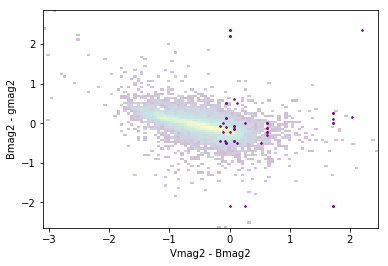

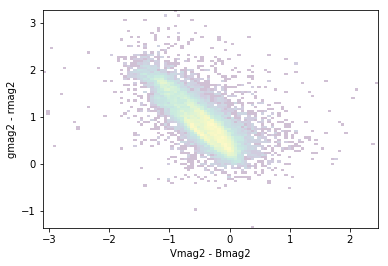

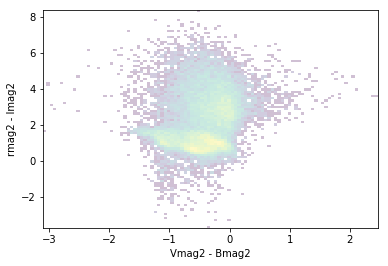

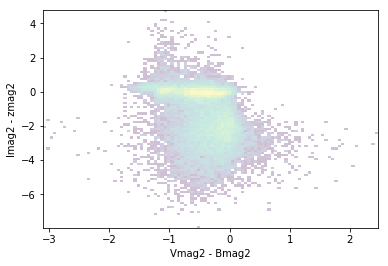

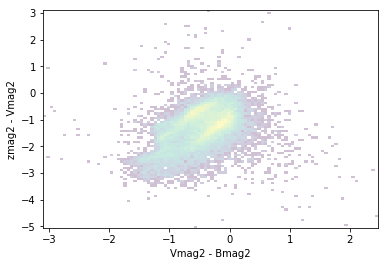

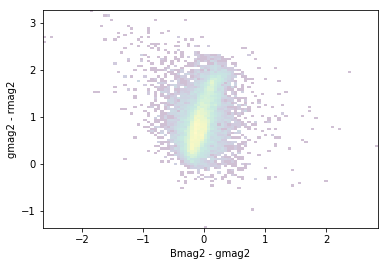

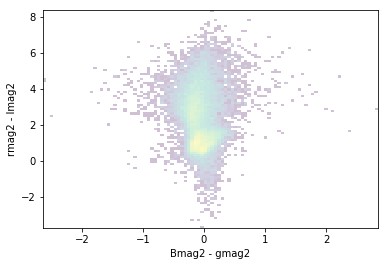

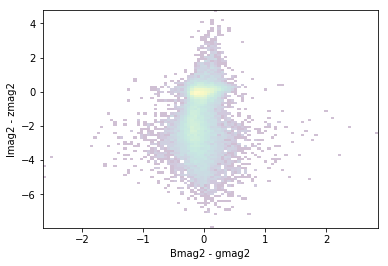

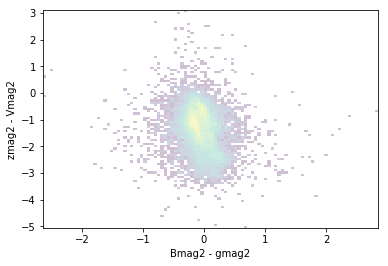

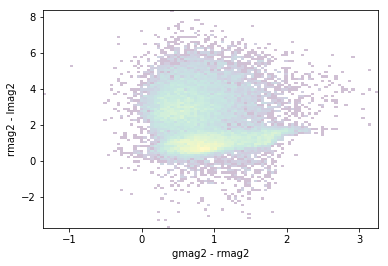

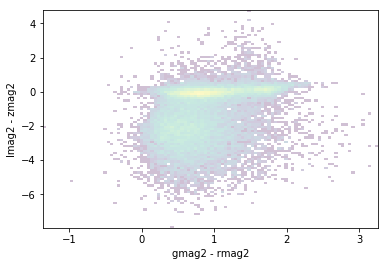

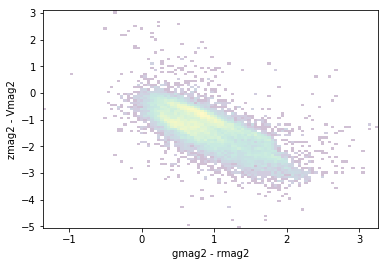

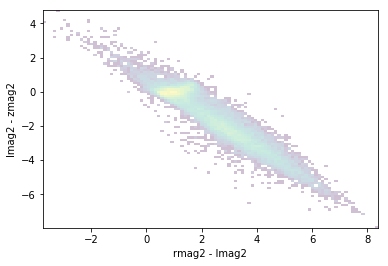

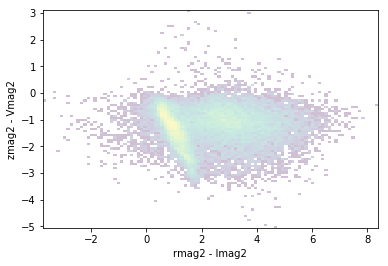

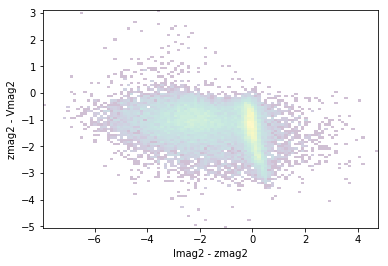

In [141]:
Numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
One = ['Vmag2 - Bmag2', 'Vmag2 - Bmag2', 'Vmag2 - Bmag2', 'Vmag2 - Bmag2', 'Vmag2 - Bmag2', 'Bmag2 - gmag2', 'Bmag2 - gmag2', 'Bmag2 - gmag2', 'Bmag2 - gmag2', 'gmag2 - rmag2', 'gmag2 - rmag2', 'gmag2 - rmag2', 'rmag2 - Imag2', 'rmag2 - Imag2', 'Imag2 - zmag2']
Two = ['Bmag2 - gmag2', 'gmag2 - rmag2', 'rmag2 - Imag2', 'Imag2 - zmag2', 'zmag2 - Vmag2', 'gmag2 - rmag2', 'rmag2 - Imag2', 'Imag2 - zmag2', 'zmag2 - Vmag2', 'rmag2 - Imag2', 'Imag2 - zmag2', 'zmag2 - Vmag2', 'Imag2 - zmag2', 'zmag2 - Vmag2', 'zmag2 - Vmag2']
for i in Numbers:
#     plt.scatter(cosmos_and_zcosmos_cross_match[One[i]], cosmos_and_zcosmos_cross_match[Two[i]], color='purple', marker='.', s=4, alpha=.25)
    plt.hist2d(cosmos_and_zcosmos_cross_match[One[i]], cosmos_and_zcosmos_cross_match[Two[i]], bins=100, alpha=.25, norm=mcolors.LogNorm())    
    plt.xlabel(One[i])
    plt.ylabel(Two[i])
#     plt.savefig(One[i] + Two[i] + 'scatter.png')
    plt.show()

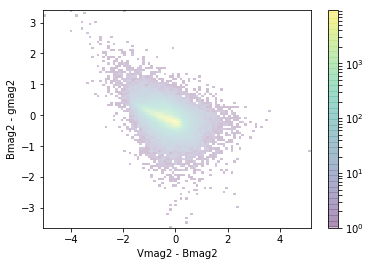

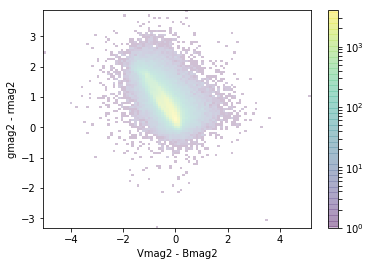

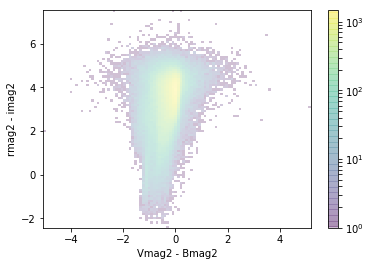

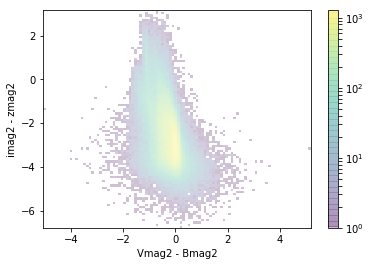

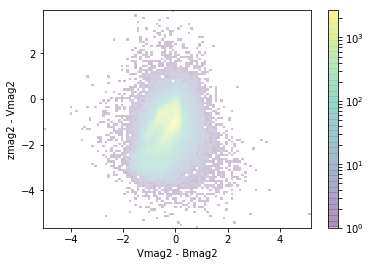

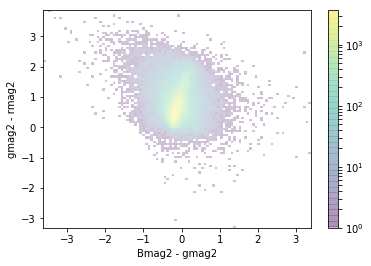

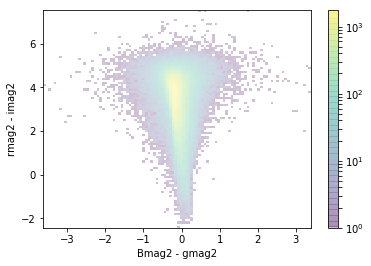

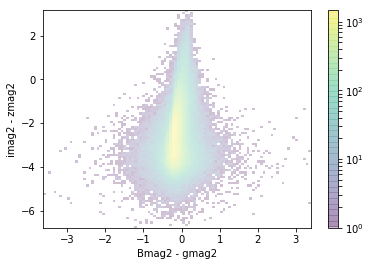

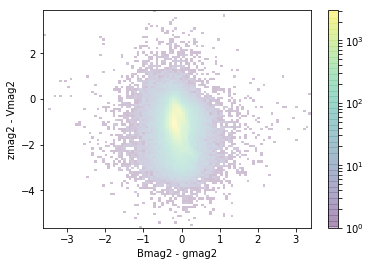

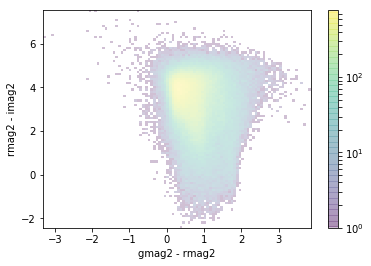

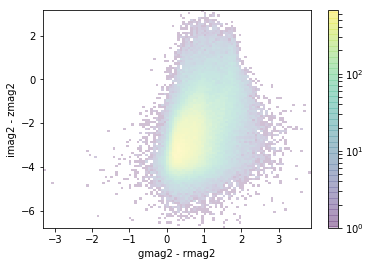

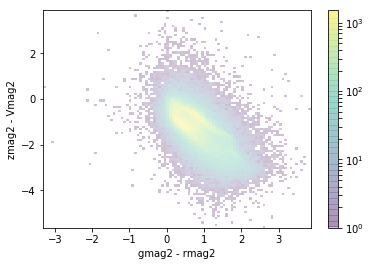

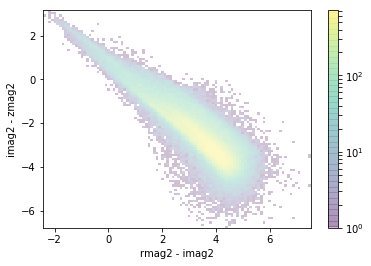

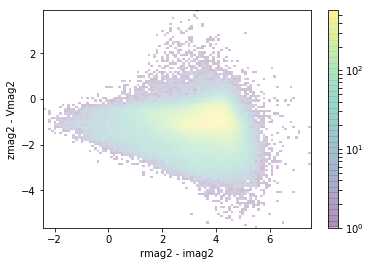

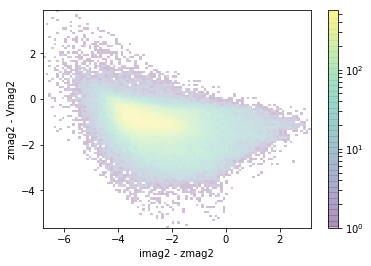

In [142]:
Numbers2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
One2 = ['Vmag2 - Bmag2', 'Vmag2 - Bmag2', 'Vmag2 - Bmag2', 'Vmag2 - Bmag2', 'Vmag2 - Bmag2', 'Bmag2 - gmag2', 'Bmag2 - gmag2', 'Bmag2 - gmag2', 'Bmag2 - gmag2', 'gmag2 - rmag2', 'gmag2 - rmag2', 'gmag2 - rmag2', 'rmag2 - imag2', 'rmag2 - imag2', 'imag2 - zmag2']
Two2 = ['Bmag2 - gmag2', 'gmag2 - rmag2', 'rmag2 - imag2', 'imag2 - zmag2', 'zmag2 - Vmag2', 'gmag2 - rmag2', 'rmag2 - imag2', 'imag2 - zmag2', 'zmag2 - Vmag2', 'rmag2 - imag2', 'imag2 - zmag2', 'zmag2 - Vmag2', 'imag2 - zmag2', 'zmag2 - Vmag2', 'zmag2 - Vmag2']
for i in Numbers2:
#     plt.scatter(cosmos_only[One2[i]], cosmos_only[Two2[i]], color='purple', marker='.', s=4, alpha=.25)
    plt.hist2d(cosmos_only[One2[i]], cosmos_only[Two2[i]], bins=100, alpha=.25, norm=mcolors.LogNorm())
    plt.colorbar()
    plt.xlabel(One2[i])
    plt.ylabel(Two2[i])
#     plt.savefig(One2[i] + Two2[i] + 'scatter.png')
    plt.show()

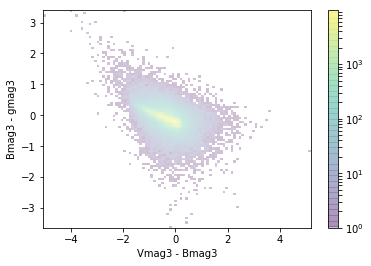

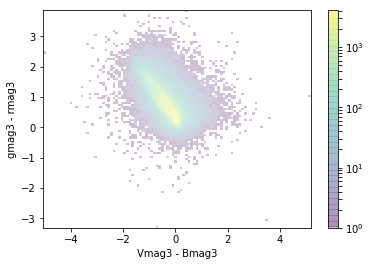

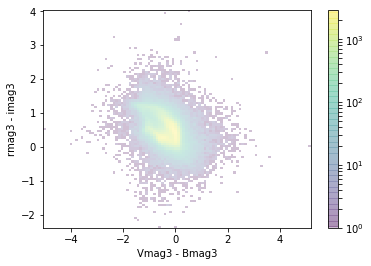

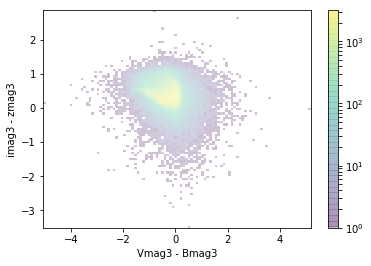

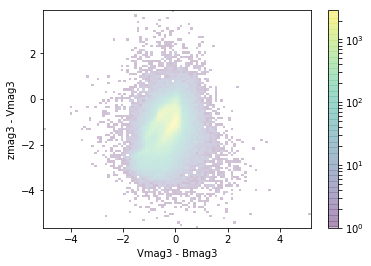

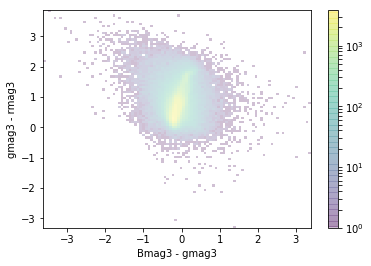

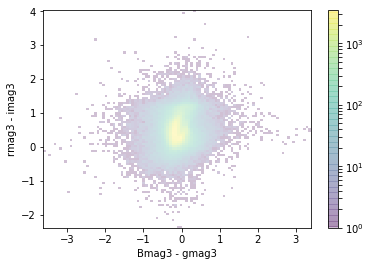

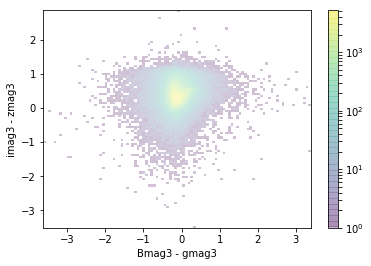

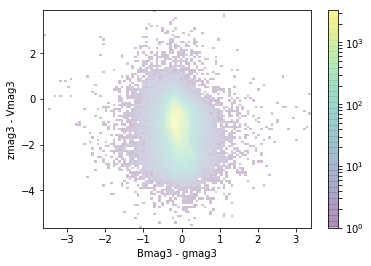

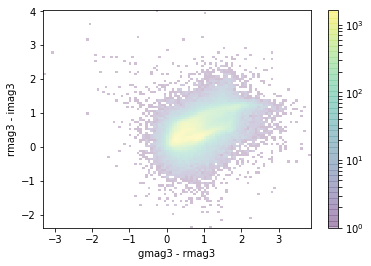

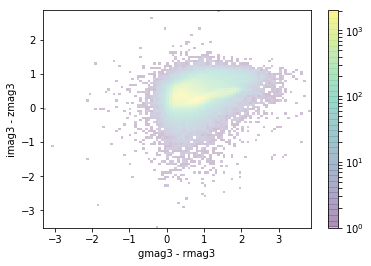

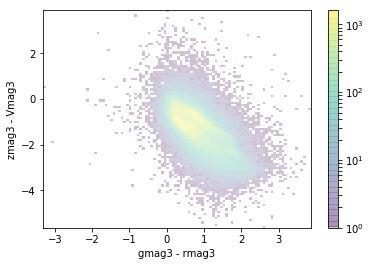

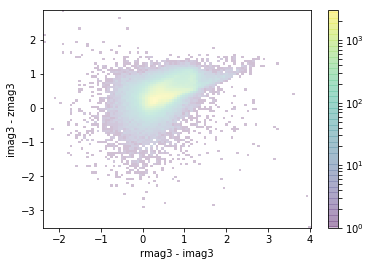

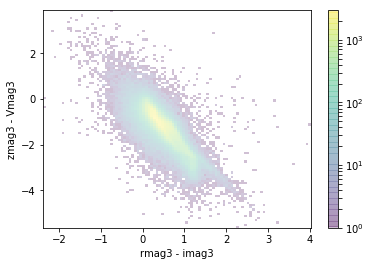

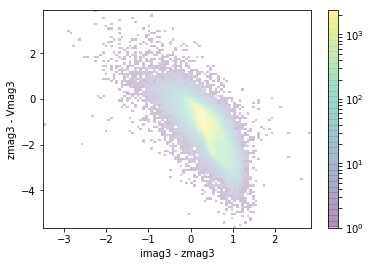

In [143]:
Numbers2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
One2 = ['Vmag3 - Bmag3', 'Vmag3 - Bmag3', 'Vmag3 - Bmag3', 'Vmag3 - Bmag3', 'Vmag3 - Bmag3', 'Bmag3 - gmag3', 'Bmag3 - gmag3', 'Bmag3 - gmag3', 'Bmag3 - gmag3', 'gmag3 - rmag3', 'gmag3 - rmag3', 'gmag3 - rmag3', 'rmag3 - imag3', 'rmag3 - imag3', 'imag3 - zmag3']
Two2 = ['Bmag3 - gmag3', 'gmag3 - rmag3', 'rmag3 - imag3', 'imag3 - zmag3', 'zmag3 - Vmag3', 'gmag3 - rmag3', 'rmag3 - imag3', 'imag3 - zmag3', 'zmag3 - Vmag3', 'rmag3 - imag3', 'imag3 - zmag3', 'zmag3 - Vmag3', 'imag3 - zmag3', 'zmag3 - Vmag3', 'zmag3 - Vmag3']
for i in Numbers2:
#     plt.scatter(cosmos[One2[i]], cosmos[Two2[i]], color='purple', marker='.', s=4, alpha=.25)
    plt.hist2d(cosmos[One2[i]], cosmos[Two2[i]], bins=100, alpha=.25, norm=mcolors.LogNorm())
    plt.colorbar()
    plt.xlabel(One2[i])
    plt.ylabel(Two2[i])
#     plt.savefig(One2[i] + Two2[i] + 'scatter.png')
    plt.show()

In [144]:
print(len(cosmos_only))

187971


In [145]:
print(len(cosmos_and_zcosmos_cross_match))

21623


In [ ]:
Numbers2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
One2 = ['Vmag3 - Bmag3', 'Vmag3 - Bmag3', 'Vmag3 - Bmag3', 'Vmag3 - Bmag3', 'Vmag3 - Bmag3', 'Bmag3 - gmag3', 'Bmag3 - gmag3', 'Bmag3 - gmag3', 'Bmag3 - gmag3', 'gmag3 - rmag3', 'gmag3 - rmag3', 'gmag3 - rmag3', 'rmag3 - imag3', 'rmag3 - imag3', 'imag3 - zmag3']
Two2 = ['Bmag3 - gmag3', 'gmag3 - rmag3', 'rmag3 - imag3', 'imag3 - zmag3', 'zmag3 - Vmag3', 'gmag3 - rmag3', 'rmag3 - imag3', 'imag3 - zmag3', 'zmag3 - Vmag3', 'rmag3 - imag3', 'imag3 - zmag3', 'zmag3 - Vmag3', 'imag3 - zmag3', 'zmag3 - Vmag3', 'zmag3 - Vmag3']
One4 = ['Vmag2 - Bmag2', 'Vmag2 - Bmag2', 'Vmag2 - Bmag2', 'Vmag2 - Bmag2', 'Vmag2 - Bmag2', 'Bmag2 - gmag2', 'Bmag2 - gmag2', 'Bmag2 - gmag2', 'Bmag2 - gmag2', 'gmag2 - rmag2', 'gmag2 - rmag2', 'gmag2 - rmag2', 'rmag2 - imag2', 'rmag2 - imag2', 'imag2 - zmag2']
Two4 = ['Bmag2 - gmag2', 'gmag2 - rmag2', 'rmag2 - imag2', 'imag2 - zmag2', 'zmag2 - Vmag2', 'gmag2 - rmag2', 'rmag2 - imag2', 'imag2 - zmag2', 'zmag2 - Vmag2', 'rmag2 - imag2', 'imag2 - zmag2', 'zmag2 - Vmag2', 'imag2 - zmag2', 'zmag2 - Vmag2', 'zmag2 - Vmag2']for i in Numbers2:
    plt.hist2d(cosmos[One2[i]], cosmos[Two2[i]], bins=100, alpha=.25, norm=mcolors.LogNorm())
    plt.scatter(zcosmos[One4[i]], cosmos[Two4[i]], color='purple', marker='.', s=4, alpha=.25)
    plt.colorbar()
    plt.xlabel(One2[i])
    plt.ylabel(Two2[i])
#     plt.savefig(One2[i] + Two2[i] + 'scatter.png')
    plt.show()